In [ ]:
# Import the Required Packages
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
from PIL import Image
import random

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/My Drive/"
base_dir = "/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Images"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Mounted at /content/drive
'Ngee Ann Poly'  'Udemy Courses'


## 1.1 Adding L1 Weight Regularizer

In [ ]:
l1_value = 0.001
img_size = 224

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3),kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_value)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['acc']
)

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_1.tf'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=25,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
history = model_1.fit(
    train_generator,
    steps_per_epoch=300,
    epochs = 50,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[model_checkpoint],
    verbose=1
)

Epoch 1/50
300/300 [==============================] - ETA: 0s - loss: 3.6860 - acc: 0.1337
Epoch 1: val_acc improved from -inf to 0.17250, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_1.tf
300/300 [==============================] - 2299s 8s/step - loss: 3.6860 - acc: 0.1337 - val_loss: 2.2834 - val_acc: 0.1725
Epoch 2/50
300/300 [==============================] - ETA: 0s - loss: 2.2755 - acc: 0.1723
Epoch 2: val_acc improved from 0.17250 to 0.17850, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_1.tf
300/300 [==============================] - 134s 445ms/step - loss: 2.2755 - acc: 0.1723 - val_loss: 2.2427 - val_acc: 0.1785
Epoch 3/50
300/300 [==============================] - ETA: 0s - loss: 2.2515 - acc: 0.1873
Epoch 3: val_acc improved from 0.17850 to 0.20700, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_1.tf
300/300 [==============================] 

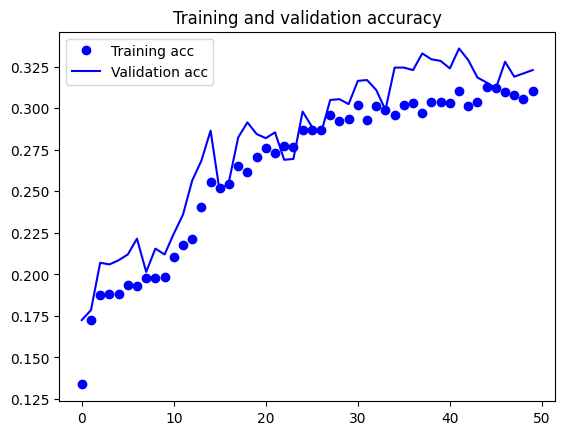

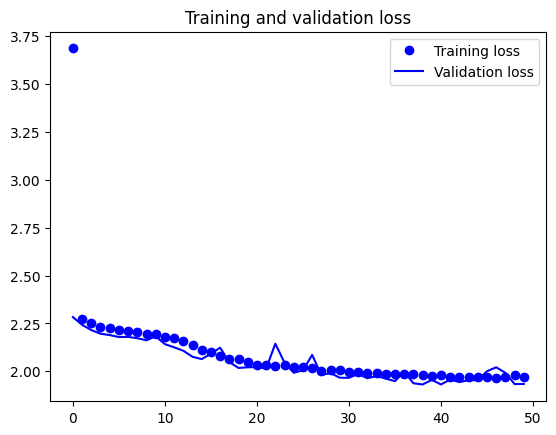

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_1 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_1.tf')

evaluation_results = model_1.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

20/20 [==============================] - 121s 6s/step - loss: 1.9477 - acc: 0.3640
Test Loss: 1.947650671005249
Test Accuracy: 0.36399999260902405


In [ ]:
x_test = []
y_test = []

class_labels = {'beet_salad': 0, 'beignets': 1, 'ceviche': 2, 'chocolate_mousse': 3, 'cup_cakes': 4,
                'greek_salad': 5, 'grilled_salmon': 6, 'pancakes': 7, 'panna_cotta': 8, 'spaghetti_bolognese': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [ ]:
predictions = model_1.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 1s 35ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.36      0.48      0.41        50
           beignets       0.54      0.44      0.48        50
            ceviche       0.10      0.06      0.08        50
   chocolate_mousse       0.34      0.26      0.30        50
          cup_cakes       0.30      0.36      0.33        50
        greek_salad       0.45      0.58      0.50        50
     grilled_salmon       0.30      0.42      0.35        50
           pancakes       0.67      0.20      0.31        50
        panna_cotta       0.37      0.20      0.26        50
spaghetti_bolognese       0.36      0.64      0.46        50

           accuracy                           0.36       500
          macro avg       0.38      0.36      0.35       500
       weighted avg       0.38      0.36      0.35       500



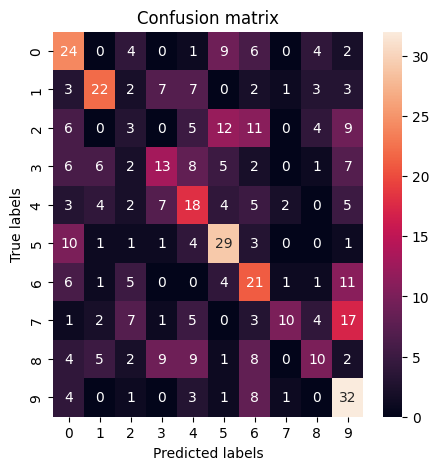

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Load the food list (in alphabetical order)
with open('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/18.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'beignets', 'ceviche', 'chocolate_mousse', 'cup_cakes', 'greek_salad', 'grilled_salmon', 'pancakes', 'panna_cotta', 'spaghetti_bolognese']


In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
online_images_dir = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Online Images'
image_files = os.listdir(online_images_dir)

for image_file in image_files:
    img_path = os.path.join(online_images_dir, image_file)
    plt.imshow(plt.imread(img_path))
    plt.show()

    img_array = image_process(img_path)
    prob_df, result = prediction(model_1, img_array, food_list)

    print(f'\nImage: {image_file}')
    print('The prediction is:', result, '\n\n', prob_df)
    print('-' * 40)

## 1.2 Adding L2 Weight Regularizer

In [ ]:
l2_value = 0.001
img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3),kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['acc']
)

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_2.tf'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=300,
    epochs = 80,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[model_checkpoint],
    verbose=1
)

Epoch 1/80
300/300 [==============================] - ETA: 0s - loss: 2.3798 - acc: 0.1573
Epoch 1: val_acc improved from -inf to 0.25600, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_2.tf
300/300 [==============================] - 131s 428ms/step - loss: 2.3798 - acc: 0.1573 - val_loss: 2.1772 - val_acc: 0.2560
Epoch 2/80
300/300 [==============================] - ETA: 0s - loss: 2.1144 - acc: 0.2665
Epoch 2: val_acc improved from 0.25600 to 0.30250, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_2.tf
300/300 [==============================] - 129s 429ms/step - loss: 2.1144 - acc: 0.2665 - val_loss: 1.9605 - val_acc: 0.3025
Epoch 3/80
300/300 [==============================] - ETA: 0s - loss: 1.9965 - acc: 0.3039
Epoch 3: val_acc improved from 0.30250 to 0.36000, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_2.tf
300/300 [==============================

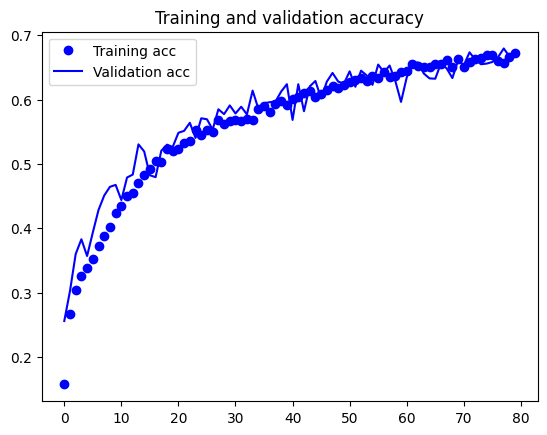

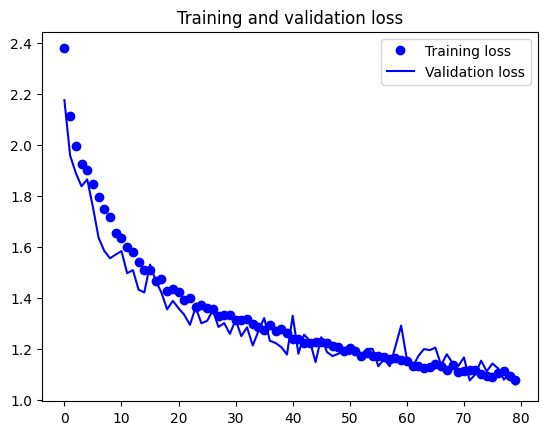

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_2 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_2.tf')

evaluation_results = model_2.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

20/20 [==============================] - 2s 98ms/step - loss: 1.0447 - acc: 0.6880
Test Loss: 1.0447025299072266
Test Accuracy: 0.6880000233650208


In [ ]:
predictions = model_2.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 1s 34ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.77      0.72      0.74        50
           beignets       0.92      0.70      0.80        50
            ceviche       0.74      0.62      0.67        50
   chocolate_mousse       0.64      0.54      0.59        50
          cup_cakes       0.52      0.66      0.58        50
        greek_salad       0.59      0.78      0.67        50
     grilled_salmon       0.74      0.56      0.64        50
           pancakes       0.69      0.70      0.69        50
        panna_cotta       0.70      0.64      0.67        50
spaghetti_bolognese       0.69      0.92      0.79        50

           accuracy                           0.68       500
          macro avg       0.70      0.68      0.68       500
       weighted avg       0.70      0.68      0.68       500



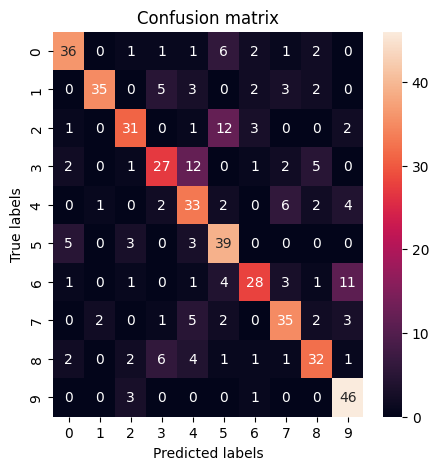

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
online_images_dir = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Online Images'
image_files = os.listdir(online_images_dir)

for image_file in image_files:
    img_path = os.path.join(online_images_dir, image_file)
    plt.imshow(plt.imread(img_path))
    plt.show()

    img_array = image_process(img_path)
    prob_df, result = prediction(model_2, img_array, food_list)

    print(f'\nImage: {image_file}')
    print('The prediction is:', result, '\n\n', prob_df)
    print('-' * 40)

## 1.3 Adding Dropout

In [ ]:
img_size = 224

model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_3.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['acc']
)

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_3.tf'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
history = model_3.fit(
    train_generator,
    steps_per_epoch=300,
    epochs = 50,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[model_checkpoint],
    verbose=1
)

Epoch 1/50
300/300 [==============================] - ETA: 0s - loss: 2.2416 - acc: 0.1575
Epoch 1: val_acc improved from -inf to 0.21000, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_3.tf
300/300 [==============================] - 138s 444ms/step - loss: 2.2416 - acc: 0.1575 - val_loss: 2.1239 - val_acc: 0.2100
Epoch 2/50
300/300 [==============================] - ETA: 0s - loss: 2.1162 - acc: 0.2151
Epoch 2: val_acc improved from 0.21000 to 0.28750, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_3.tf
300/300 [==============================] - 134s 447ms/step - loss: 2.1162 - acc: 0.2151 - val_loss: 1.9426 - val_acc: 0.2875
Epoch 3/50
300/300 [==============================] - ETA: 0s - loss: 1.9289 - acc: 0.2929
Epoch 3: val_acc improved from 0.28750 to 0.36050, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_3.tf
300/300 [==============================

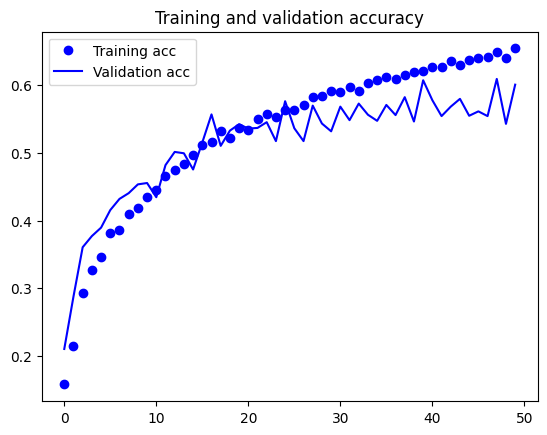

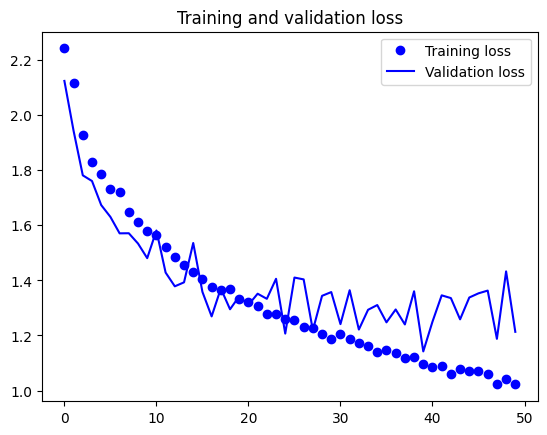

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_3 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 4/model_3.tf')

evaluation_results = model_3.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

20/20 [==============================] - 2s 94ms/step - loss: 1.1948 - acc: 0.6220
Test Loss: 1.194840431213379
Test Accuracy: 0.621999979019165


In [ ]:
predictions = model_3.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 1s 37ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.85      0.56      0.67        50
           beignets       0.69      0.74      0.71        50
            ceviche       0.92      0.24      0.38        50
   chocolate_mousse       0.42      0.56      0.48        50
          cup_cakes       0.58      0.38      0.46        50
        greek_salad       0.60      0.76      0.67        50
     grilled_salmon       0.59      0.60      0.59        50
           pancakes       0.51      0.84      0.63        50
        panna_cotta       0.57      0.56      0.57        50
spaghetti_bolognese       0.80      0.88      0.84        50

           accuracy                           0.61       500
          macro avg       0.65      0.61      0.60       500
       weighted avg       0.65      0.61      0.60       500



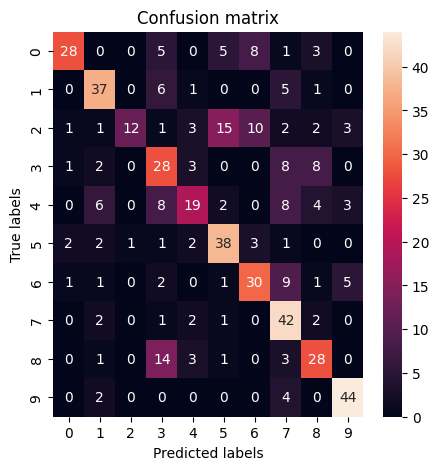

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
online_images_dir = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Online Images'
image_files = os.listdir(online_images_dir)

for image_file in image_files:
    img_path = os.path.join(online_images_dir, image_file)
    plt.imshow(plt.imread(img_path))
    plt.show()

    img_array = image_process(img_path)
    prob_df, result = prediction(model_3, img_array, food_list)

    print(f'\nImage: {image_file}')
    print('The prediction is:', result, '\n\n', prob_df)
    print('-' * 40)